In [7]:
import pandas as pd 
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedKFold
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import label_binarize

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix,multilabel_confusion_matrix,roc_auc_score,roc_curve,auc,ConfusionMatrixDisplay,precision_score,recall_score

In [8]:
x_train_all=pd.read_csv("CompleteDataSet/x_train_all.csv")
y_train_all=pd.read_csv("CompleteDataSet/y_train_all.csv")
x_test_all=pd.read_csv("CompleteDataSet/x_test_all.csv")
y_test_all=pd.read_csv("CompleteDataSet/y_test_all.csv")

### Metrics

In [3]:
def metric(Y_test,predicted):   
    # accuracy = accuracy_score(Y_test,predicted )
    f1 = f1_score(predicted, Y_test, average="weighted")
    conf_matrix = confusion_matrix(predicted, Y_test)
    precision = precision_score(Y_test, predicted, average="weighted",zero_division=1)
    recall = recall_score(Y_test, predicted, average="weighted")

    # Y_test_bin = label_binarize(Y_test, classes=[0, 1, 2,3,4,5,6,7,8,9])
    # roc = roc_auc_score(Y_test_bin, predicted_probs, multi_class="ovr", average="weighted")

    conf_matrices = multilabel_confusion_matrix(Y_test, predicted)
    tp = conf_matrices[:,1,1]
    fp = conf_matrices[:,0,1]
    tn = conf_matrices[:,0,0]
    fn = conf_matrices[:,1,0]
    fpr = (fp/(tn + fp), tp + fn)
    tnr = (tn/(tn + fp), tp + fn)

    # fpr, tpr, _ = roc_curve(Y_test_bin.ravel(), predicted_probs.ravel())


    # auc_val = auc(fpr, tpr)
    # plt.figure()
    # plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC (area = %0.2f)' % auc_val)
    # plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    # plt.xlabel('False Positive Rate')
    # plt.ylabel('True Positive Rate')
    # plt.title('ROC Curve')
    # plt.legend(loc="lower right")
    # plt.show()

    # out=ConfusionMatrixDisplay(conf_matrix,display_labels=gnb.classes_)
    # out.plot()
    # plt.show()
    # print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("Precision:", precision)
    print("Recall/Sensitivity/True Positive Rate:", recall)
    print("Specificity:", tnr)
    print("False Positive Rate:", fpr)
    # print("Area under ROC curve:", roc)
    print("Confusion Matrix:\n", conf_matrix)


In [3]:
def _nanaverage(a, weights=None):
    """Compute the weighted average, ignoring NaNs.

    Parameters
    ----------
    a : ndarray
        Array containing data to be averaged.
    weights : array-like, default=None
        An array of weights associated with the values in a. Each value in a
        contributes to the average according to its associated weight. The
        weights array can either be 1-D of the same shape as a. If weights=None,
        then all data in a are assumed to have a weight equal to one.

    Returns
    -------
    weighted_average : float
        The weighted average.

    Notes
    -----
    This wrapper to combine :func:numpy.average and :func:numpy.nanmean, so
    that :func:np.nan values are ignored from the average and weights can
    be passed. Note that when possible, we delegate to the prime methods.
    """

    if len(a) == 0:
        return np.nan

    mask = np.isnan(a)
    if mask.all():
        return np.nan

    if weights is None:
        return np.nanmean(a)

    weights = np.array(weights, copy=False)
    a, weights = a[~mask], weights[~mask]
    try:
        return np.average(a, weights=weights)
    except ZeroDivisionError:
        # this is when all weights are zero, then ignore them
        return np.average(a)

### Cross Validation

In [1]:
from sklearn.model_selection import KFold 
# from sklearn.utils.extmath import _nanaverage

In [38]:
def kfold_10(input,output):
    kf = KFold(n_splits=10) 
    dt_classifier = DecisionTreeClassifier()
    accuracy_scores = []
    auc_scores = []
    prec_scores = []
    roc_scores=[]
    tps=[]
    fps=[]
    fns=[]
    tns=[]
    f1_scores = []
    recall_scores=[]
    for train_index, test_index in kf.split(input):
        print("Train:", len( train_index), "Validation:",len(test_index))
        X_train, X_test = input.iloc[train_index], input.iloc[test_index] 
        y_train, y_test = output.iloc[train_index], output.iloc[test_index]
        dt_classifier.fit(X_train, y_train)
        pred=dt_classifier.predict(X_test)
        predicted_probs=dt_classifier.predict_proba(X_test)
        accuracy = accuracy_score(y_test, pred)
        precision = precision_score(y_test, pred, average="weighted",zero_division=1)
        f1 = f1_score( y_test,pred, average="weighted")
        recall = recall_score( y_test, pred, average="weighted")
        # Y_test_bin = label_binarize( y_test, classes=[0, 1, 2,3,4,5,6,7,8,9])
        # roc = roc_auc_score(Y_test_bin, predicted_probs, multi_class="ovr", average="weighted")
        # fpr, tpr, _ = roc_curve(Y_test_bin.ravel(), predicted_probs.ravel())
        # auc_val=auc(fpr, tpr)
        conf_matrices = multilabel_confusion_matrix(y_test, pred)
        conf_matrix = confusion_matrix(y_test, pred)
        print("Confusion Matrix:\n", conf_matrix)
        tp = conf_matrices[:,1,1]
        fp = conf_matrices[:,0,1]
        tn = conf_matrices[:,0,0]
        fn = conf_matrices[:,1,0]
        # auc_scores.append(auc_val)
        # roc_scores.append(roc)
        f1_scores.append(f1)
        recall_scores.append(recall)
        prec_scores.append(precision)
        accuracy_scores.append(accuracy)
        # fpr = fp/(tn + fp)
        # tnr = tn/(tn + fp)
        # tps.append(tnr)
        # fps.append(fpr)
   
    avg_roc=sum(roc_scores)/10
    avg_f1=sum(f1_scores)/10
    avg_f1=sum(f1_scores)/10
    avg_recall=sum(recall_scores)/10
    avg_prec=sum(prec_scores)/10
    average_accuracy = sum(accuracy_scores) / 10
      
   
    # avg_auc=sum(auc_scores)/10
    plt.figure()
    # plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC (area = %0.2f)' % avg_auc)
    # plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    # plt.xlabel('False Positive Rate')
    # plt.ylabel('True Positive Rate')
    # plt.title('ROC Curve')
    # plt.legend(loc="lower right")
    # plt.show()
    # tp_avg=sum(tps)
    # fp_avg=sum(fps)
    # print("roc_avg",avg_roc)
    # print("Average tpr",tp_avg)
    # print("Average fpr",fp_avg)
   
    print(f"Average Accuracy: {average_accuracy}")
    print(f"Average Precision: {avg_prec}")
    print(f"Average Recall: {avg_recall}")
    print(f"Average F1: {avg_f1}")





In [39]:
x_train_all.shape

(9690, 2304)

In [40]:
y_train_all.shape

(9690, 1)

In [41]:
kfold_10(x_train_all,y_train_all)

Train: 4845 Validation: 4845


c:\Users\anshu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
 [[   0    0    0   48  114    2    1    3   28   14]
 [   0    0    0  621 1252   27   70   72   94   84]
 [   0    0    0  903  824  118   36  135  166   68]
 [   0    0    0  142    6   10    2    1    0    4]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]
Train: 4845 Validation: 4845
Confusion Matrix:
 [[   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [  20  355  578  292    0    0    0    0    0    0]
 [ 124 1159  616   81    0    0    0    0    0    0]
 [  24   57  120    9    0    0    0    0    0    0]
 [  19   75  225   41    0    0    0    0    0    0]
 [  15   90  118   17    0    0

c:\Users\anshu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 640x480 with 0 Axes>

In [9]:
def train_test_split(X_train,X_test,y_test,y_train):
    dt_classifier = DecisionTreeClassifier()
    dt_classifier.fit(X_train,y_train)
    predicted=dt_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, predicted)
    metric(y_test,predicted)
    predicted_probs = dt_classifier.predict_proba(X_test)

    accuracy = accuracy_score(y_test,predicted )
    f1 = f1_score(predicted, y_test, average="weighted")
    conf_matrix = confusion_matrix(y_test, predicted)
    precision = precision_score(y_test, predicted, average="weighted",zero_division=1)
    recall = recall_score(y_test, predicted, average="weighted")

    Y_test_bin = label_binarize(y_test, classes=[0, 1, 2,3,4,5,6,7,8,9])
    roc = roc_auc_score(Y_test_bin, predicted_probs, multi_class="ovr", average="weighted")

    conf_matrices = multilabel_confusion_matrix(y_test, predicted)
    tp = conf_matrices[:,1,1]
    fp = conf_matrices[:,0,1]
    tn = conf_matrices[:,0,0]
    fn = conf_matrices[:,1,0]
    # fpr = (fp/(tn + fp), tp + fn)    
    fpr, tpr, _ = roc_curve(Y_test_bin.ravel(), predicted_probs.ravel())


    auc_val = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC (area = %0.2f)' % auc_val)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    out=ConfusionMatrixDisplay(conf_matrix,display_labels=dt_classifier.classes_)
    out.plot()
    plt.show()
    print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("Precision:", precision)
    print("Recall/Sensitivity/True Positive Rate:", recall)
    print("False Positive Rate:", fpr)
    print("Area under ROC curve:", roc)
    print("Confusion Matrix:\n", conf_matrix)


F1 Score: 0.6899350411618205
Precision: 0.6822558021509955
Recall/Sensitivity/True Positive Rate: 0.686084142394822
Specificity: (array([0.98580858, 0.90548523, 0.92820513, 0.93939394, 0.91522634,
       0.98811881, 0.98833333, 0.99075908, 0.9877551 , 0.98866667]), array([ 60, 720, 750, 450, 660,  60,  90,  60, 150,  90], dtype=int64))
False Positive Rate: (array([0.01419142, 0.09451477, 0.07179487, 0.06060606, 0.08477366,
       0.01188119, 0.01166667, 0.00924092, 0.0122449 , 0.01133333]), array([ 60, 720, 750, 450, 660,  60,  90,  60, 150,  90], dtype=int64))
Confusion Matrix:
 [[ 24  10   1   2  25   0   1   0   4   0]
 [ 17 559  68  32  52   0  11  25   9  10]
 [  4  57 569  58  30   1   3   1   9   5]
 [  3  13  44 303  53   8  10   6  17   6]
 [  7  62  56  24 479  22   9   0  25   1]
 [  0   1   3   3   2  29   3   9   5  10]
 [  3   1   2   8   7   0  36   1  12   1]
 [  2  12   2   2   2   0   1  12   2   5]
 [  0   3   4   8   7   0   8   0  63   6]
 [  0   2   1  10   3   0 

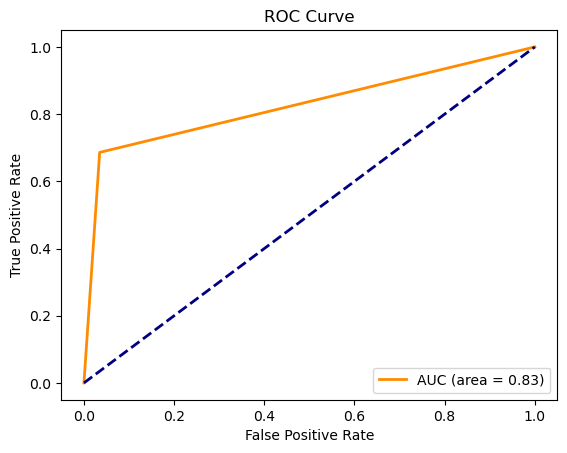

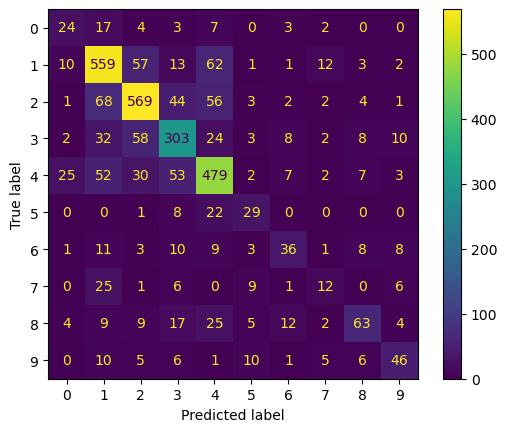

Accuracy: 0.686084142394822
F1 Score: 0.6899350411618205
Precision: 0.6822558021509955
Recall/Sensitivity/True Positive Rate: 0.686084142394822
False Positive Rate: [0.         0.03487954 1.        ]
Area under ROC curve: 0.8088761039014093
Confusion Matrix:
 [[ 24  17   4   3   7   0   3   2   0   0]
 [ 10 559  57  13  62   1   1  12   3   2]
 [  1  68 569  44  56   3   2   2   4   1]
 [  2  32  58 303  24   3   8   2   8  10]
 [ 25  52  30  53 479   2   7   2   7   3]
 [  0   0   1   8  22  29   0   0   0   0]
 [  1  11   3  10   9   3  36   1   8   8]
 [  0  25   1   6   0   9   1  12   0   6]
 [  4   9   9  17  25   5  12   2  63   4]
 [  0  10   5   6   1  10   1   5   6  46]]


In [10]:
train_test_split(x_train_all,x_test_all,y_test_all,y_train_all)